In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("https://gist.githubusercontent.com/aanorbel/563e5ce7f30e9e6bf25e430a8464ffbb/raw/1a557bdcfe0a4061eaa980120a57de74c2fbf0f5/income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


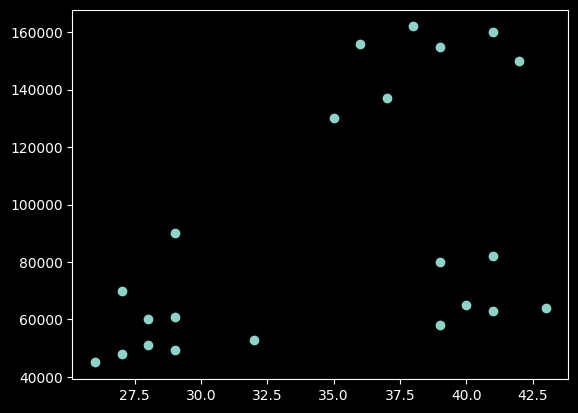

In [3]:
plt.scatter(df['Age'], df['Income($)'])

In [4]:
km = KMeans(n_clusters=3)
km

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [5]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [6]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


/var/folders/r7/b2rrp5kx5psfxy_3c2518r3c0000gn/T/ipykernel_93003/3109108893.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


,Name,Age,Income($),cluster
0,Rob,27,70000,0
2,Mohan,29,61000,0
3,Ismail,28,60000,0
11,Tom,26,45000,0
12,Arnold,27,48000,0
13,Jared,28,51000,0
14,Stark,29,49500,0
15,Ranbir,32,53000,0
16,Dipika,40,65000,0
17,Priyanka,41,63000,0


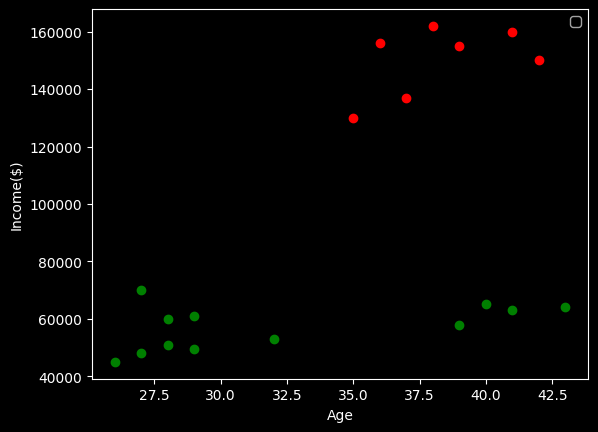

In [7]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
df1

In [8]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Age', 'Income($)']])
df['Age'] = scaler.fit_transform(df[['Age']])
df['Income($)'] = scaler.fit_transform(df[['Income($)']])

# scaler.fit(df[['Income($)']])
# df['Income($)'] = scaler.transform(df[['Income($)']])
# df.Income($) = scaler.transform(df.Income($)) #invalid syntax ($)

# scaler.fit(df[['Age']])
# df['Age'] = scaler.transform(df[['Age']])
# df = df.drop('age', axis=1)
# scaled_data
df


# Use double brackets [['column_name']] to ensure you're passing a 2D DataFrame.
# Keep the column access consistent (using either df['column_name'] or df.column_name without special characters).

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [9]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(scaled_data)
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

Text(0, 0.5, 'Income($)')

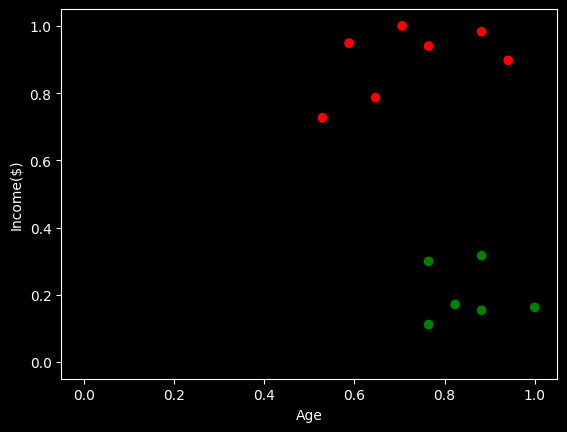

In [10]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]


colors = ['red', 'black', 'green']
plt.scatter(df.Age,df['Income($)'], c=[colors[label] for label in y_predicted])

# plt.scatter(df1['Age'],df1['Income($)'],color='green')
# plt.scatter(df2['Age'],df2['Income($)'],color='red')
# plt.scatter(df3['Age'],df3['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
# plt.legend()scatter = plt.scatter(df.Age, df['Income($)'], c=y_predicted, cmap='viridis')

In [11]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
# 
sse

[5.43401151198818,
 2.3456144914725936,
 0.4750783498553096,
 0.36877340764405897,
 0.2766936276300279,
 0.2458471421037595,
 0.20992845959463838,
 0.14258711825476095,
 0.10497488680620909]

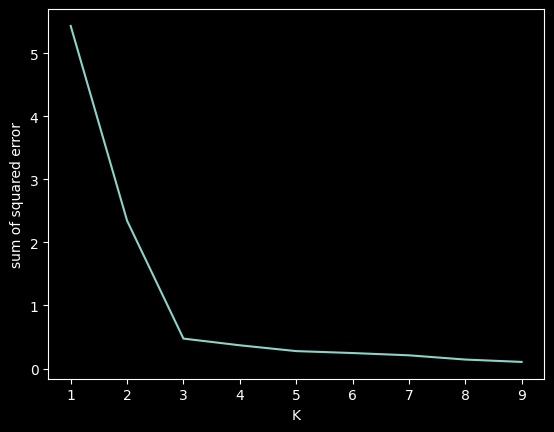

In [12]:
plt.xlabel('K')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)

In [13]:
# import tensorflow as trf

In [14]:
km.cluster_centers_

array([[0.05882353, 0.02564103],
       [0.82352941, 0.30769231],
       [0.68627451, 0.96296296],
       [0.17647059, 0.38461538],
       [0.58823529, 0.75641026],
       [0.35294118, 0.06837607],
       [0.86764706, 0.14957265],
       [0.91176471, 0.94017094],
       [0.13235294, 0.1292735 ]])

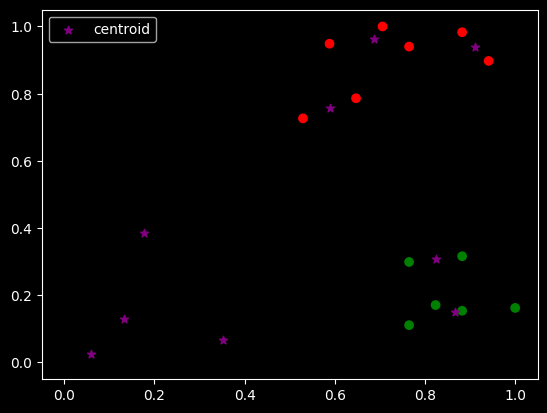

In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

# plt.scatter(df1['Age'],df1['Income($)'],color='black', label='income($)')
# plt.scatter(df2['Age'],df2['Income($)'],color='green', label='income($)')
# plt.scatter(df3['Age'],df3['Income($)'],color='red', label='income($)')

plt.scatter(df.Age,df['Income($)'], c=[colors[label] for label in y_predicted])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [16]:
# import tensorflow as trf